In [8]:
from sklearn.datasets import load_breast_cancer
import numpy as np
data = load_breast_cancer()
X = data.data
y = data.target

In [41]:
print("data.keys(): \n{}".format(data.keys())) 

print("data.DESCR(): \n{}".format(data.DESCR))

print(np.count_nonzero(y == 0))
print(np.count_nonzero(y == 1))
## 개수가 불균등하니까 roc를 사용한다.

data.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
data.DESCR(): 
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these 

In [48]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# 두개 다 사용해보는 것
X_1 = X[:, 0:2]
Reg = LogisticRegression()
Reg.fit(X_1, y)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


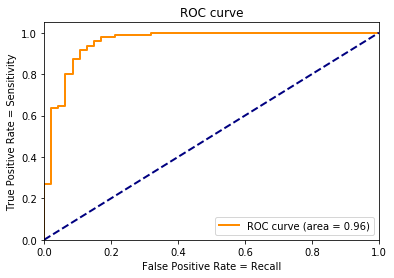

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y)
y_score = y_score = Reg.fit(X_train, y_train).decision_function(X_test)

roc_auc = roc_auc_score(y_test, y_score)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


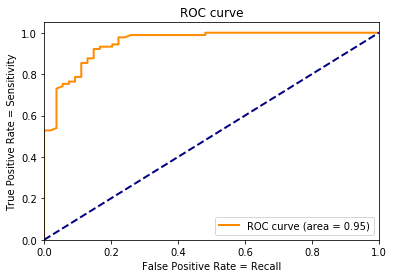

In [50]:
##하나씩만 사용해 보는 것
X_2 = X[:, 0].reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_2, y)
y_score = y_score = Reg.fit(X_train, y_train).decision_function(X_test)

roc_auc = roc_auc_score(y_test, y_score)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


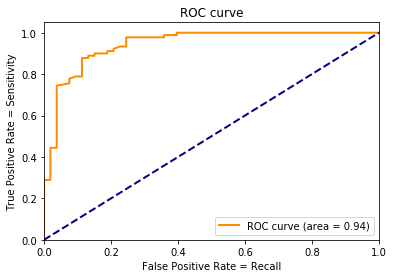

In [46]:
X_3 = X[:, 1].reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_3, y)
y_score = y_score = Reg.fit(X_train, y_train).decision_function(X_test)

roc_auc = roc_auc_score(y_test, y_score)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [47]:
## 2개의 변수 모두를 사용하였을떄의 값이 0.96로 가장 크기 때문에, 2개의 변수를 모두 사용한 모델을 사용한다.


In [52]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=0)
for train_index, test_index in cv.split(X):
    print(X_1[train_index], y[test_index])


[[17.99  10.38 ]
 [19.69  21.25 ]
 [11.42  20.38 ]
 [20.29  14.34 ]
 [12.45  15.7  ]
 [18.25  19.98 ]
 [13.71  20.83 ]
 [13.    21.82 ]
 [12.46  24.04 ]
 [15.78  17.89 ]
 [15.85  23.95 ]
 [14.68  20.13 ]
 [19.81  22.15 ]
 [13.54  14.36 ]
 [13.08  15.71 ]
 [15.34  14.26 ]
 [21.16  23.04 ]
 [16.65  21.38 ]
 [17.14  16.4  ]
 [14.58  21.53 ]
 [18.61  20.25 ]
 [15.3   25.27 ]
 [17.57  15.05 ]
 [18.63  25.11 ]
 [17.02  23.98 ]
 [19.27  26.47 ]
 [16.13  17.88 ]
 [16.74  21.59 ]
 [14.25  21.72 ]
 [14.99  25.2  ]
 [13.48  20.82 ]
 [13.44  21.58 ]
 [10.95  21.35 ]
 [19.07  24.81 ]
 [13.28  20.28 ]
 [13.17  21.81 ]
 [13.17  18.66 ]
 [12.05  14.63 ]
 [13.49  22.3  ]
 [11.76  21.6  ]
 [13.64  16.34 ]
 [11.94  18.24 ]
 [18.22  18.7  ]
 [15.1   22.02 ]
 [11.52  18.75 ]
 [19.21  18.57 ]
 [14.71  21.59 ]
 [13.05  19.31 ]
 [ 8.618 11.79 ]
 [10.17  14.88 ]
 [ 8.598 20.98 ]
 [14.25  22.15 ]
 [ 9.173 13.86 ]
 [14.78  23.94 ]
 [11.31  19.04 ]
 [ 9.029 17.33 ]
 [12.78  16.49 ]
 [18.94  21.31 ]
 [17.2   24.52

In [53]:
# cross_val_score 모듈
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0) # target이 골고루 분포되도록 shuffle 옵션
scores = cross_val_score(LogisticRegression(), X, y, cv=kfold)
scores 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.95614035, 0.99122807, 0.9122807 , 0.93859649, 0.97345133])

In [54]:
scores = cross_val_score(LogisticRegression(), X_2, y, cv = 5) 
scores 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.83478261, 0.84347826, 0.88495575, 0.95575221, 0.92035398])

In [55]:
display(scores.mean(), scores.var())

0.8878645632935745

0.0020921188351810823

In [58]:
param_grid = {'C': scores, 'penalty': ['l1','l2']}
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5) # 보통 교차검증을 사용한 그리드 서치를 시행!
# GridSearchCV(모델, 파라미터 딕셔너리)
grid_search.fit(X, y)

print('최적의 파라미터: ', grid_search.best_params_)
print('최고 성능 모델: ', grid_search.best_estimator_)
print('최고 교차검증 점수: {:.2f}'.format(grid_search.best_score_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence thi

최적의 파라미터:  {'C': 0.8347826086956521, 'penalty': 'l1'}
최고 성능 모델:  LogisticRegression(C=0.8347826086956521, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
최고 교차검증 점수: 0.95


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [59]:
# 데이터프레임으로 교차검증 결과 확인해보자 (grid_search.cv_results_)
pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
# 처음 다섯 개 행 출력
display(np.transpose(results.head()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,0,1,2,3,4
mean_fit_time,0.338892,0.00797725,0.3353,0.00777845,0.253721
std_fit_time,0.141663,0.00089255,0.0927009,0.00116235,0.106765
mean_score_time,0.000598621,0.000598955,0.000599194,0.00039916,0.000997305
std_score_time,0.000488772,0.000489045,0.00048924,0.00048887,7.38713e-07
param_C,0.834783,0.834783,0.843478,0.843478,0.884956
param_penalty,l1,l2,l1,l2,l1
params,"{'C': 0.8347826086956521, 'penalty': 'l1'}","{'C': 0.8347826086956521, 'penalty': 'l2'}","{'C': 0.8434782608695652, 'penalty': 'l1'}","{'C': 0.8434782608695652, 'penalty': 'l2'}","{'C': 0.8849557522123894, 'penalty': 'l1'}"
split0_test_score,0.93913,0.930435,0.930435,0.930435,0.93913
split1_test_score,0.93913,0.93913,0.93913,0.93913,0.930435
split2_test_score,0.973451,0.973451,0.973451,0.973451,0.973451
